In [1]:
using Images, FileIO

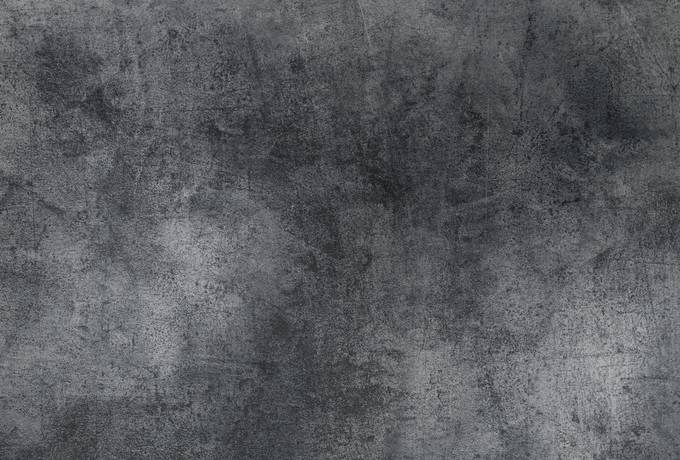

In [2]:
path = "metal.jpg"
img = load(path)

In [95]:

function getImg(img)
    height, width = size(img)
    imgCopy::Array{RGB{Float64},1} = []
    for x ∈ 1:height
        for y ∈ 1:width
            rgb = img[x,y]
            average = (rgb.r)
            push!(imgCopy, RGB(average, average, average))
        end
    end
    return reshape(imgCopy, (width, height))
end

getImg (generic function with 1 method)

In [143]:
weights = [0.0,0.0,0.0,0.0]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

369.5392794939539
[1.0000821861365252, 0.9997519898798618, 0.9997567734741025, 1.0003013569528958]


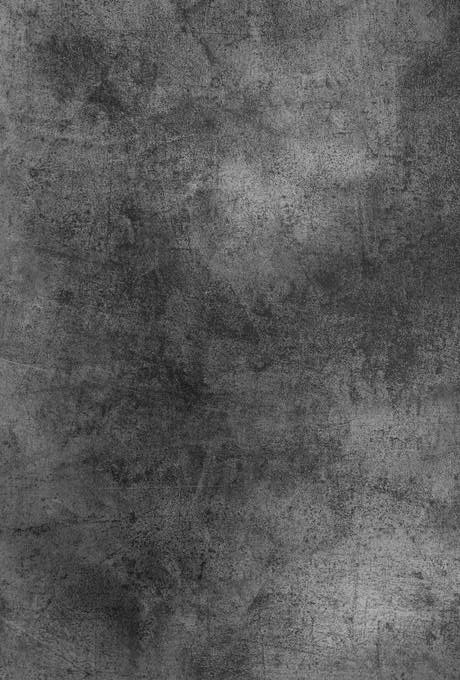

In [150]:
metal = getImg(img)
height, width = size(metal)
α = 0.0001
function predict(percepts, weights, actual)
    predicted = 0
    for i ∈ 1:4
        weights[i] -= α*(percepts[i].r*weights[i] - actual.r)
        predicted += percepts[i].r*weights[i]
    end
    predicted /= 4
    error = (predicted - actual.r)^2
    return error
end
error = 0
for x ∈ 2:(height-1)
    for y ∈ 2:(width-1)
        percepts = [metal[x-1,y], metal[x+1,y], metal[x,y+1], metal[x,y-1]]
        error += predict(percepts, weights, metal[x,y])
    end
end
println(error)
println(weights)
metal

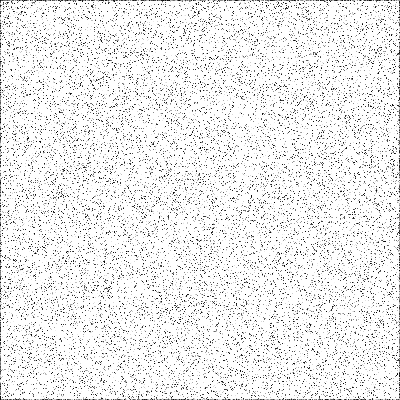

In [236]:
function predictPixel(percepts, weights)
    predicted = 0
    for i ∈ 1:4
        predicted += percepts[i].r + weights[i]
    end
    
    return predicted/4
end
function generateImg(height, width, weights)
    linearData::Array{RGB{Float64}, 1} = []
    for x ∈ 1:height
        for y ∈ 1:width
            val = rand()
            push!(linearData, RGB(val, val, val))
        end
    end
    data = reshape(linearData, (height, width))
    dataCopy = copy(data)
    for x ∈ 1:height
        for y ∈ 1:width
            x = rand(2:(height-1))
            y = rand(2:(width-1))
            percepts = [data[x-1,y], data[x+1,y], data[x,y+1], data[x,y-1]]
            predicted = predictPixel(percepts, weights)
            dataCopy[x,y] = RGB(predicted,predicted,predicted)
        end
    end
    dataCopy2 = copy(dataCopy)
    for x ∈ 1:height
        for y ∈ 1:width
            x = rand(2:(height-1))
            y = rand(2:(width-1))
            percepts = [data[x-1,y], data[x+1,y], data[x,y+1], data[x,y-1]]
            predicted = predictPixel(percepts, weights)
            dataCopy2[x,y] = RGB(predicted,predicted,predicted)
        end
    end
    
    return dataCopy2
end
generateImg(400,400,weights)

In [182]:
rand(1:10)

10

In [238]:
typeof(metal)

Array{RGB{Float64},2}